In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # adjust the configuration of the plots

#Read in the data
df=pd.read_csv(r'C:\Users\naguk\Downloads\movies.csv')

In [2]:
# Explore data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
print(df.shape)

(7668, 15)


In [6]:
# Drop duplicates
df=df.drop_duplicates()
print(df.shape)

(7668, 15)


In [7]:
# Display the object data type with empty cells
df.select_dtypes(include=['object']).isnull().sum()

name         0
rating      77
genre        0
released     2
director     0
writer       3
star         1
country      3
company     17
dtype: int64

In [8]:
# Replace all object data types that are empty with "Missing"
for column in df.select_dtypes(include=['object']):
    df[column].fillna('Missing',inplace=True)

In [9]:
#Display the number of object data type with corresponding number of empty cells
df.select_dtypes(include=['object']).isnull().sum()

name        0
rating      0
genre       0
released    0
director    0
writer      0
star        0
country     0
company     0
dtype: int64

In [10]:
#Display the number of float64 data type with corresponding number of empty cells
df.select_dtypes(include=['float64']).isnull().sum()

score         3
votes         3
budget     2171
gross       189
runtime       4
dtype: int64

In [11]:
# Replace all float64 data types that are empty with "0"
for column in df.select_dtypes(include=['float64']):
    df[column].fillna(0,inplace=True)

In [12]:
#Display the number of float64 data type with corresponding number of empty cells
df.select_dtypes(include=['float64']).isnull().sum()

score      0
votes      0
budget     0
gross      0
runtime    0
dtype: int64

In [13]:
#Display the number of int64 data type with corresponding number of empty cells
df.select_dtypes(include=['int64']).isnull().sum()

year    0
dtype: int64

In [14]:
# Change data type of columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['votes']=df['votes'].astype('int64')

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [16]:
# reorder the columns
df = df.reindex(['budget','company','country','director','genre','gross','name','rating','released','runtime','score','star',
                'votes','writer','year'], axis=1)
print(df.shape)

(7668, 15)


In [17]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980 (United States)",146.0,8.4,Jack Nicholson,927000,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980 (United States)",104.0,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980 (United States)",124.0,8.7,Mark Hamill,1200000,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980 (United States)",88.0,7.7,Robert Hays,221000,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980 (United States)",98.0,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980


In [18]:
# Replace some text in the released column
df['released']=df['released'].str.replace(r"\(.*\)","")

In [19]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980",146.0,8.4,Jack Nicholson,927000,Stephen King,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980",104.0,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980",124.0,8.7,Mark Hamill,1200000,Leigh Brackett,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980",88.0,7.7,Robert Hays,221000,Jim Abrahams,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980",98.0,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980


In [20]:
#Create correct year column
df['year_correct']=df['released'].astype(str).str[-5:]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,19000000,Warner Bros.,United Kingdom,Stanley Kubrick,Drama,46998772,The Shining,R,"June 13, 1980",146.0,8.4,Jack Nicholson,927000,Stephen King,1980,1980
1,4500000,Columbia Pictures,United States,Randal Kleiser,Adventure,58853106,The Blue Lagoon,R,"July 2, 1980",104.0,5.8,Brooke Shields,65000,Henry De Vere Stacpoole,1980,1980
2,18000000,Lucasfilm,United States,Irvin Kershner,Action,538375067,Star Wars: Episode V - The Empire Strikes Back,PG,"June 20, 1980",124.0,8.7,Mark Hamill,1200000,Leigh Brackett,1980,1980
3,3500000,Paramount Pictures,United States,Jim Abrahams,Comedy,83453539,Airplane!,PG,"July 2, 1980",88.0,7.7,Robert Hays,221000,Jim Abrahams,1980,1980
4,6000000,Orion Pictures,United States,Harold Ramis,Comedy,39846344,Caddyshack,R,"July 25, 1980",98.0,7.3,Chevy Chase,108000,Brian Doyle-Murray,1980,1980


In [21]:
#Sorting by gross
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
5445,237000000,Twentieth Century Fox,United States,James Cameron,Action,2847246203,Avatar,PG-13,"December 18, 2009",162.0,7.8,Sam Worthington,1100000,James Cameron,2009,2009
7445,356000000,Marvel Studios,United States,Anthony Russo,Action,2797501328,Avengers: Endgame,PG-13,"April 26, 2019",181.0,8.4,Robert Downey Jr.,903000,Christopher Markus,2019,2019
3045,200000000,Twentieth Century Fox,United States,James Cameron,Drama,2201647264,Titanic,PG-13,"December 19, 1997",194.0,7.8,Leonardo DiCaprio,1100000,James Cameron,1997,1997
6663,245000000,Lucasfilm,United States,J.J. Abrams,Action,2069521700,Star Wars: Episode VII - The Force Awakens,PG-13,"December 18, 2015",138.0,7.8,Daisy Ridley,876000,Lawrence Kasdan,2015,2015
7244,321000000,Marvel Studios,United States,Anthony Russo,Action,2048359754,Avengers: Infinity War,PG-13,"April 27, 2018",149.0,8.4,Robert Downey Jr.,897000,Christopher Markus,2018,2018


In [22]:
#Display max row if not available by default
pd.set_option('display.max_rows',None)

In [23]:
# Drop any duplicates to see umique data
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [24]:
#Budget high correlation
#Company hihg correlation

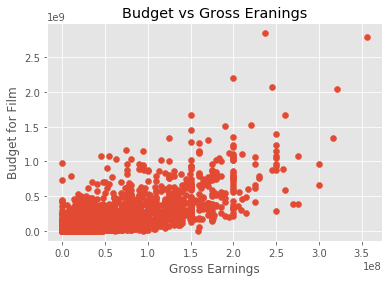

In [25]:
#Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Eranings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

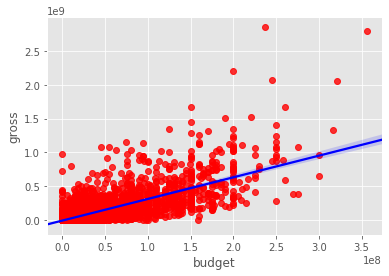

In [26]:
#Plot budget vs gross usung seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [27]:
# Lets look at correlations
df.corr(method='pearson') #pearson, kendail, spearman

,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.268372,0.056863,0.486931,0.309212
gross,0.750157,1.000000,0.244339,0.186012,0.632870,0.261900
runtime,0.268372,0.244339,1.000000,0.394564,0.306984,0.116358
score,0.056863,0.186012,0.394564,1.000000,0.407101,0.092616
votes,0.486931,0.632870,0.306984,0.407101,1.000000,0.222427
year,0.309212,0.261900,0.116358,0.092616,0.222427,1.000000


In [28]:
#High correlation between budget and gross

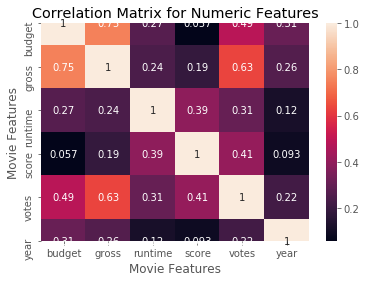

In [29]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [30]:
# Make company numeric
df_numerized=df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,19000000,2320,55,2589,6,46998772,6587,7,1510,146.0,8.4,1047,927000,4015,1980,0
1,4500000,731,56,2269,1,58853106,5573,7,1311,104.0,5.8,327,65000,1632,1980,0
2,18000000,1540,56,1111,0,538375067,5142,5,1568,124.0,8.7,1745,1200000,2567,1980,0
3,3500000,1813,56,1301,4,83453539,286,5,1311,88.0,7.7,2247,221000,2000,1980,0
4,6000000,1778,56,1054,4,39846344,1027,7,1360,98.0,7.3,410,108000,521,1980,0


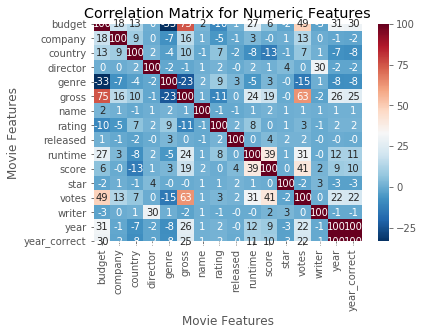

In [31]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix*100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [32]:
df_numerized.corr().head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
budget,1.000000,0.183916,0.131526,0.004976,-0.334021,0.750157,0.020548,-0.097327,0.010179,0.268372,0.056863,-0.020152,0.486931,-0.026538,0.309212,0.299603
company,0.183916,1.000000,0.094364,0.004298,-0.070461,0.155081,0.010075,-0.053455,-0.008510,0.031726,-0.002959,0.009188,0.131622,0.002853,-0.011180,-0.016328
country,0.131526,0.094364,1.000000,0.017736,-0.036475,0.095242,-0.010397,0.066148,-0.021844,-0.077591,-0.134223,-0.014388,0.073732,0.014766,-0.069946,-0.080773
director,0.004976,0.004298,0.017736,1.000000,-0.015258,-0.014916,0.009079,0.020088,-0.001315,0.017062,0.010568,0.039692,0.000349,0.299517,-0.020795,-0.020439
genre,-0.334021,-0.070461,-0.036475,-0.015258,1.000000,-0.234297,0.016355,0.090041,0.029518,-0.052914,0.027384,-0.004879,-0.145296,0.006700,-0.081261,-0.077550


In [33]:
#Unstacking
correlation_mat=df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

budget        budget          1.000000
              company         0.183916
              country         0.131526
              director        0.004976
              genre          -0.334021
              gross           0.750157
              name            0.020548
              rating         -0.097327
              released        0.010179
              runtime         0.268372
              score           0.056863
              star           -0.020152
              votes           0.486931
              writer         -0.026538
              year            0.309212
              year_correct    0.299603
company       budget          0.183916
              company         1.000000
              country         0.094364
              director        0.004298
              genre          -0.070461
              gross           0.155081
              name            0.010075
              rating         -0.053455
              released       -0.008510
              runtime    

In [34]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget        genre          -0.334021
genre         budget         -0.334021
gross         genre          -0.234297
genre         gross          -0.234297
              votes          -0.145296
votes         genre          -0.145296
score         country        -0.134223
country       score          -0.134223
rating        gross          -0.107710
gross         rating         -0.107710
rating        budget         -0.097327
budget        rating         -0.097327
genre         year           -0.081261
year          genre          -0.081261
country       year_correct   -0.080773
year_correct  country        -0.080773
country       runtime        -0.077591
runtime       country        -0.077591
genre         year_correct   -0.077550
year_correct  genre          -0.077550
company       genre          -0.070461
genre         company        -0.070461
year          country        -0.069946
country       year           -0.069946
company       rating         -0.053455
rating        company    

In [35]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross         votes           0.632870
votes         gross           0.632870
gross         budget          0.750157
budget        gross           0.750157
year_correct  year            0.997295
year          year_correct    0.997295
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
dtype: float64

In [36]:
# Votes and budget have the highest correlation to gross earnings

In [37]:
# Company has no correlation with gross earnings